# AI4PH Tools for Data Science: Notebooks and Versioning
## Assignment Description
To demonstrate mastery of the course material, learners will create a Jupyter Notebook that walks through a sample dataset, from data ingestion, basic cleaning, visualization, and calculation of summary statistics. 

The notebook should include the following elements:

1. Data Loading: Import a public health dataset of your choice
2. Exploratory Data Analysis: Perform exploratory data analysis on the cleaned dataset using pandas and matplotlib and create at least one informative visualizations and the calculation of at least two summary statistics. 
3. Version Control: Use Git to create a repository for your notebook, and commit your changes regularly. Ensure that your notebook is properly versioned and documented.
4. Reproducibility: Use virtual environments and include a requirements.txt file that lists all the dependencies and versions of the libraries used.
5. Documentation: Document your notebook using Markdown cells, and provide clear and concise explanations of your code and analysis.
The repository should demonstrate the learner’s ability to use Virtual Environments, Jupyter Notebooks, Pandas, Matplotlib, Git and Github. The notebook will be assessed based on the quality of your analysis, the clarity of your documentation, and the reproducibility and maintainability of your code.

Please upload a link to your Github Public Repository where the assignment can be found.  

In [36]:
# import required packages
import requests
import pandas as pd
import matplotlib.pyplot as plt

## Data Loading
Download and load the data from the source.
<br>
Source: https://data.ontario.ca/dataset/covid-19-vaccine-data-in-ontario/resource/274b819c-5d69-4539-a4db-f2950794138c
<br>
**Excerpt:**
<br>
This data set reported the total number of patients in hospital by vaccination status without taking into consideration the number of people in Ontario who are vaccinated overall. Comparing groups using count data (such as the number of patients) is appropriate when the groups being compared are about the same size (i.e. around mid-2021). However, now that approximately 87% of eligible Ontarians are fully vaccinated (compared to 3% partially vaccinated and 10% unvaccinated) this comparison is no longer appropriate and may be misleading.

In [7]:
# download the data
url = 'https://data.ontario.ca/dataset/752ce2b7-c15a-4965-a3dc-397bf405e7cc/resource/274b819c-5d69-4539-a4db-f2950794138c/download/vac_status_hosp_icu.csv'
filename = 'data/vac_status_hosp_icu.csv'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
response = requests.get(url, headers=headers)

In [8]:
# write data to file
with open(filename, mode="wb") as file:
    file.write(response.content)

In [13]:
# load the data as pandas dataframe
all_cases = pd.read_csv(filename)
all_cases.head()

,date,icu_unvac,icu_partial_vac,icu_full_vac,hospitalnonicu_unvac,hospitalnonicu_partial_vac,hospitalnonicu_full_vac
0,2021-08-10,22,3,0,23,4,11
1,2021-08-11,37,5,2,34,7,8
2,2021-08-12,45,5,2,44,7,9
3,2021-08-13,52,5,3,65,6,8
4,2021-08-14,53,4,1,67,6,11


## Data Cleaning

In [18]:
print(f'The number of all cases is {len(all_cases)}.')
print('DataFrame Info:')
all_cases.info()


The number of all cases is 318.
DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   date                        318 non-null    object
 1   icu_unvac                   318 non-null    int64 
 2   icu_partial_vac             318 non-null    int64 
 3   icu_full_vac                318 non-null    int64 
 4   hospitalnonicu_unvac        318 non-null    int64 
 5   hospitalnonicu_partial_vac  318 non-null    int64 
 6   hospitalnonicu_full_vac     318 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 17.5+ KB


In [20]:
# basic statistics for each column
all_cases.describe()

,icu_unvac,icu_partial_vac,icu_full_vac,hospitalnonicu_unvac,hospitalnonicu_partial_vac,hospitalnonicu_full_vac
count,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000
mean,70.210692,7.264151,61.223270,196.666667,39.899371,496.000000
std,48.020989,4.580101,59.469716,167.817355,44.409436,545.809814
min,6.000000,1.000000,0.000000,23.000000,4.000000,8.000000
25%,31.000000,4.000000,15.000000,99.000000,11.000000,42.750000
50%,64.000000,6.000000,47.500000,135.500000,22.000000,365.500000
75%,88.750000,9.000000,79.000000,221.500000,49.000000,810.500000
max,232.000000,28.000000,281.000000,784.000000,219.000000,2119.000000


In [31]:
# date range of the data
print(f"start date:\t{all_cases['date'].min()}\nend date:\t{all_cases['date'].max()}")

start date:	2021-08-10
end date:	2022-06-23


Text(0.5, 1.0, 'Number of ICU Patients Categorized by Vaccination Status')

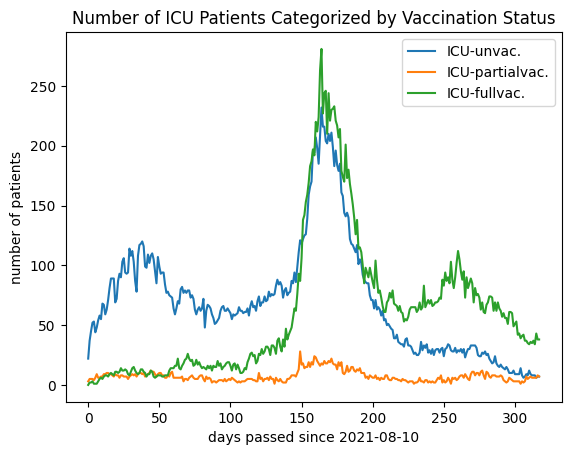

In [42]:
# plot the number of unvacinated/partially vaccinated/fully vaccinated ICU patients per day 
plt.figure()
all_cases['icu_unvac'].plot(kind='line')
all_cases['icu_partial_vac'].plot(kind='line')
all_cases['icu_full_vac'].plot(kind='line')
plt.xlabel(f"days passed since {all_cases['date'].min()}")
plt.ylabel("number of patients")
plt.legend(["ICU-unvac.", "ICU-partialvac.", "ICU-fullvac."])
plt.title("Number of ICU Patients Categorized by Vaccination Status")
